# Import Libraries

In [37]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Loading Sentiment Analysis Data 

In [2]:
df = pd.read_csv(r"C:\Users\mdimr\Downloads\All Projects\NLP-Project\reviews_extracted_files\reviews.csv")

df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,file_name
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,review_1.txt
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,review_10.txt
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,review_100.txt
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",review_1000.txt
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,review_10000.txt


# Checking missing values

In [3]:
df.isna().sum()

ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
ReviewSummary             27
ReviewText                 0
file_name                  0
dtype: int64

# Imputing Missing Values

In [4]:
# Calculate the mode for 'ProfileName' and 'ReviewSummary'
profile_name_mode = df['ProfileName'].mode()[0]
review_summary_mode = df['ReviewSummary'].mode()[0]

# Fill missing values with the mode without using inplace=True
df['ProfileName'] = df['ProfileName'].fillna(profile_name_mode)
df['ReviewSummary'] = df['ReviewSummary'].fillna(review_summary_mode)

# Verify that there are no more missing values in these columns
print(df.isnull().sum())


ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
file_name                 0
dtype: int64


# Score Mapping

In [5]:
# Define the mapping dictionary
score_mapping = {1: 'negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'positive'}

# Apply the mapping to the 'Score' column and create a new column 'Rating'
df['Score_Rating'] = df['Score'].map(score_mapping)

# Display the DataFrame
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,file_name,Score_Rating
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,review_1.txt,positive
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,review_10.txt,positive
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,review_100.txt,negative
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",review_1000.txt,negative
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,review_10000.txt,positive
...,...,...,...,...,...,...,...,...,...,...,...
568449,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...,review_99995.txt,positive
568450,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,5,1254096000,yummy!,I just love it and will buy another box when I...,review_99996.txt,positive
568451,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...,review_99997.txt,positive
568452,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...,review_99998.txt,positive


# Sample from Data

In [6]:
from sklearn.model_selection import train_test_split

strata_column = 'Score_Rating'

# Perform Stratified Sampling
df, _ = train_test_split(df, test_size=(len(df) - 50000) / len(df), stratify=df[strata_column], random_state=42)

# Check the size of the sampled dataset
print("Sampled Dataset Size:", len(df))

Sampled Dataset Size: 50000


# Segregating  Inputs and Output

In [7]:
# Define the predictors (X) and target variable (y)
X = df[['ReviewText']]

y = df['Score_Rating']

# Splitting into Train and Test 

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 1) (40000,)
(10000, 1) (10000,)


# Data Cleaning

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from textblob import TextBlob

def clean(doc):
    
    # Ensure doc is a string
    if isinstance(doc, str):
        # HTML Parsing and Cleanup
        soup = BeautifulSoup(doc, "html.parser")
        doc = soup.get_text()
    else:
        raise ValueError("Input should be a string containing HTML content.")

    # Removing Special characters
    regex = '[^a-zA-Z\s]'
    doc = re.sub(regex, '', doc)

    # Lowercase text
    text = doc.lower()

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    custom_stop_words = {'br','one','product','will','flavor','love','taste'}
    stop_words = stop_words.union(custom_stop_words)
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join and return
    return " ".join(lemmatized_tokens)

In [10]:
def tokenizer(doc):
    # Tokenization
    return nltk.word_tokenize(doc) 

# Vectorizing using Bow

In [11]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectoriezer
bow_vect = CountVectorizer(token_pattern=None,
                           tokenizer=tokenizer,
                           ngram_range=(1, 1), 
                           lowercase=False, 
                           preprocessor=clean, 
                           stop_words=None)

# use it to extract features from training data
%time X_train_transformed = bow_vect.fit_transform(X_train['ReviewText'])

print()
print(f"Shape of X_train_transformed (# of docs, # of unique vocabulary): {X_train_transformed.shape}")
print(f"Type of X_train_transformed (i.e. Compressed Sparse Row (CSR) format): {type(X_train_transformed)}")
print(f"Vocabulary learned: {bow_vect.get_feature_names_out()[:10]}")

CPU times: total: 1min 27s
Wall time: 2min 28s

Shape of X_train_transformed (# of docs, # of unique vocabulary): (40000, 59738)
Type of X_train_transformed (i.e. Compressed Sparse Row (CSR) format): <class 'scipy.sparse._csr.csr_matrix'>
Vocabulary learned: ['aa' 'aaaa' 'aaaaa' 'aaaaaaaaaaa' 'aaaahs' 'aaah' 'aaahhhhhh' 'aafco'
 'aafcoa' 'aafes']


# Vectorizing Class Label

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [13]:
X_test_transformed = bow_vect.transform(X_test['ReviewText'])
print(f'Shape of X_test_transformed: {X_test_transformed.shape}') 

Shape of X_test_transformed: (10000, 59738)


In [14]:
y_test = label_encoder.fit_transform(y_test)

# Implementing MlFlow (Mlops)

In [15]:
#pip install mlflow

# Tracking server

In [15]:
import mlflow

# Set the tracking URI to the local server (default)
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Setting Experiment 

In [16]:
import mlflow

mlflow.set_experiment("Sentiment_Analysis_Amazon")

<Experiment: artifact_location='mlflow-artifacts:/749261390504894018', creation_time=1727232553198, experiment_id='749261390504894018', last_update_time=1727232553198, lifecycle_stage='active', name='Sentiment_Analysis_Amazon', tags={}>

# Creating Pipleines for Differnt Algorithms 

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Define pipelines without any scaling
pipelines = {
    'logistic_regression': Pipeline([
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    
    'naive_bayes': Pipeline([
        ('classifier', GaussianNB())
    ]),
    
    'decision_tree': Pipeline([
        ('classifier', DecisionTreeClassifier())
    ]),
    
    'random_forest': Pipeline([
        ('classifier', RandomForestClassifier())
    ])
    
    
}


# Hyperparameter Tuning for all mentioned algorithms 

In [18]:
param_grids = {
    'logistic_regression': {
        'classifier__C': [10, 100],  # Regularization strength
        'classifier__penalty': ['l1'],  # Penalties
        'classifier__solver': ['liblinear']  # Solvers
    },
    
    'naive_bayes': {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]  # Variance smoothing parameter for GaussianNB
    },
    
    'decision_tree': {
        'classifier__max_depth': [None, 10, 20, 30],  # Depth of the tree
        'classifier__criterion': ['gini', 'entropy']  # Splitting criteria
    },
    
    'random_forest': {
        'classifier__n_estimators': [100, 200, 500],  # Number of trees in the forest
        'classifier__max_depth': [None],  # Depth of each tree
        'classifier__criterion': ['gini']  # Splitting criteria
    }
}



# Using Joblib for memoization , serialization and deserialization

In [19]:
import joblib
from joblib import Memory

import os


# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)


# Using PCA to reduce dimensionality

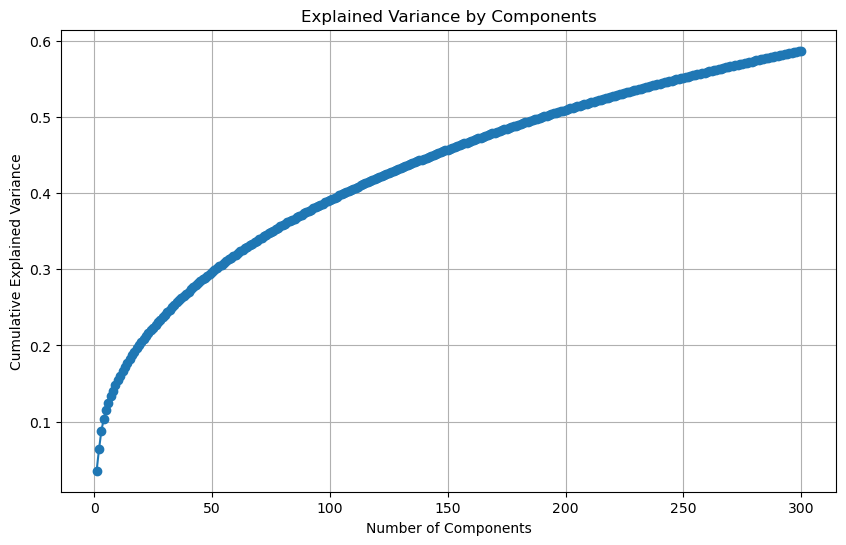

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [21]:
from sklearn.decomposition import PCA

# Choose a number of components based on the plot
desired_number_of_components = 300  # For example, adjust based on plot
pca = PCA(n_components=desired_number_of_components)
X_train_reduced = pca.fit_transform(X_train_transformed)
X_test_reduced = pca.transform(X_test_transformed)


# Autologging Runs and Building models using all hyperparameters

In [23]:
import os
import joblib
import mlflow
from sklearn.model_selection import GridSearchCV
import numpy as np
import time
from sklearn.utils import parallel_backend

# Start MLflow autologging
mlflow.autolog()  # <-- This line is added here

dev = "Ayesha"
best_models = {}

# Create directory for best models if it doesn't exist
if not os.path.exists('best_models'):
    os.makedirs('best_models')

# Loop through each algorithm pipeline
for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    
    # Define the GridSearchCV
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=3, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=3)  # Increased verbosity for detailed logging

    # Fit the model with context manager to handle potential timeout
    start_fit_time = time.time()
    try:
        with parallel_backend('threading', n_jobs=-1):  # Use threading for better memory management
            grid_search.fit(X_train_reduced, y_train)  # Use your vectorized data
    except Exception as e:
        print(f"Error fitting model {algo}: {e}")
        continue  # Skip to the next algorithm
    end_fit_time = time.time()

    # Predict using the best model
    start_predict_time = time.time()
    try:
        y_pred = grid_search.predict(X_test_reduced)  # Use your vectorized data
    except Exception as e:
        print(f"Error predicting with model {algo}: {e}")
        continue  # Skip to the next algorithm
    end_predict_time = time.time()

    # Save the best model
    try:
        model_path = f'best_models/{algo}.pkl'
        joblib.dump(grid_search.best_estimator_, model_path)
        model_size = os.path.getsize(model_path)
    except Exception as e:
        print(f"Error saving model {algo}: {e}")
        continue  # Skip to the next algorithm

    # Print model performance metrics
    test_score = grid_search.score(X_test_reduced, y_test)  # Use the test set directly
    print('Test Score: ', test_score)
    print("Fit Time: ", end_fit_time - start_fit_time)
    print("Predict Time: ", end_predict_time - start_predict_time)
    print("Model Size: ", model_size)
    print()

    # Log the experiment run with MLflow (autologging should cover this)
    try:
        with mlflow.start_run(run_name=f"Sentiment Analysis {algo}"):  # Dynamically set the run name
            mlflow.set_tag("developer", dev)
            mlflow.set_tag("team", "data_science")
            mlflow.set_tag("model_type", algo)  # Set model_type based on the current algorithm
            mlflow.log_param("algorithm", algo)
            mlflow.log_param("hyperparameter_grid", param_grids[algo])
            mlflow.log_param("best_hyperparameter", grid_search.best_params_)
            # The metrics and model should already be logged by autolog
    except Exception as e:
        print(f"Error logging model with MLflow for {algo}: {e}")


2024/09/25 18:49:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/09/25 18:49:26 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2024/09/25 18:49:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/09/25 18:49:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.


********** logistic_regression **********


2024/09/25 18:49:29 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2024/09/25 18:49:29 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f228f76

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END classifier__C=10, classifier__penalty=l1, classifier__solver=liblinear;, score=(train=0.821, test=0.813) total time=  41.8s
[CV 1/3] END classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear;, score=(train=0.821, test=0.813) total time= 1.1min
[CV 3/3] END classifier__C=10, classifier__penalty=l1, classifier__solver=liblinear;, score=(train=0.822, test=0.811) total time= 1.2min
[CV 2/3] END classifier__C=10, classifier__penalty=l1, classifier__solver=liblinear;, score=(train=0.820, test=0.820) total time= 2.0min
[CV 3/3] END classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear;, score=(train=0.822, test=0.811) total time= 1.1min
[CV 2/3] END classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear;, score=(train=0.820, test=0.820) total time= 1.8min


2024/09/25 18:53:33 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.
2024/09/25 18:53:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run beautiful-calf-415 at: http://127.0.0.1:5000/#/experiments/749261390504894018/runs/74185ffa96c7453ba20f042cd82830ca.
2024/09/25 18:53:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run bold-ram-259 at: http://127.0.0.1:5000/#/experiments/749261390504894018/runs/3f04ae4c8bbe44a1a3808c9a404a2305.
2024/09/25 18:53:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/749261390504894018.
2024/09/25 18:53:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/749261390504894018.
2024/09/25 18:53:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run overjoyed-croc-105 at: http://127.0.0.1:5000/#/experiments/749261390504894018/runs/f228f763710b4b3e8d0bda361ce6aa0e.
2024/09/25 18:53:33 INFO mlflow.tr

Test Score:  0.8104
Fit Time:  244.78197526931763
Predict Time:  0.16181325912475586
Model Size:  8185



2024/09/25 18:53:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Sentiment Analysis logistic_regression at: http://127.0.0.1:5000/#/experiments/749261390504894018/runs/d4df3213506048938c07e284dc57d774.
2024/09/25 18:53:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/749261390504894018.
2024/09/25 18:53:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7ee2b21dd11b404fb30c65e99a8546f3', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


********** naive_bayes **********
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END classifier__var_smoothing=1e-09;, score=(train=0.654, test=0.653) total time=   1.5s
[CV 1/3] END classifier__var_smoothing=1e-08;, score=(train=0.654, test=0.653) total time=   1.5s
[CV 2/3] END classifier__var_smoothing=1e-09;, score=(train=0.656, test=0.654) total time=   1.3s
[CV 3/3] END classifier__var_smoothing=1e-09;, score=(train=0.655, test=0.655) total time=   1.4s
[CV 2/3] END classifier__var_smoothing=1e-08;, score=(train=0.656, test=0.654) total time=   1.5s[CV 2/3] END classifier__var_smoothing=1e-07;, score=(train=0.656, test=0.654) total time=   1.5s

[CV 1/3] END classifier__var_smoothing=1e-07;, score=(train=0.654, test=0.653) total time=   1.5s
[CV 3/3] END classifier__var_smoothing=1e-08;, score=(train=0.655, test=0.655) total time=   1.5s
[CV 3/3] END classifier__var_smoothing=1e-07;, score=(train=0.655, test=0.655) total time=   0.7s


2024/09/25 18:53:57 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.
2024/09/25 18:53:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run unleashed-duck-411 at: http://127.0.0.1:5000/#/experiments/749261390504894018/runs/24ce48b8d8874b3ab61374670018785c.
2024/09/25 18:53:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/749261390504894018.
2024/09/25 18:53:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run unique-stork-737 at: http://127.0.0.1:5000/#/experiments/749261390504894018/runs/4dfaec60ca86486f878da13ebc8ee183.
2024/09/25 18:53:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run resilient-chimp-948 at: http://127.0.0.1:5000/#/experiments/749261390504894018/runs/a820b986434341fca4079fe921a9a374.
2024/09/25 18:53:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/749261390504894018.
2024/09/25 18:53:58 INFO mlfl

Test Score:  0.648
Fit Time:  24.31186580657959
Predict Time:  0.30419206619262695
Model Size:  15277



2024/09/25 18:54:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Sentiment Analysis naive_bayes at: http://127.0.0.1:5000/#/experiments/749261390504894018/runs/635a8702585047db8916eeb2f1d7ac9a.
2024/09/25 18:54:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/749261390504894018.
2024/09/25 18:54:00 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '020a2c2c28f24ed88f4ae8db1043d08c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


********** decision_tree **********
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END classifier__criterion=gini, classifier__max_depth=10;, score=(train=0.849, test=0.754) total time= 1.1min
[CV 1/3] END classifier__criterion=gini, classifier__max_depth=None;, score=(train=1.000, test=0.685) total time= 2.1min
[CV 2/3] END classifier__criterion=gini, classifier__max_depth=10;, score=(train=0.846, test=0.746) total time= 1.1min
[CV 2/3] END classifier__criterion=gini, classifier__max_depth=None;, score=(train=1.000, test=0.686) total time= 2.2min
[CV 3/3] END classifier__criterion=gini, classifier__max_depth=None;, score=(train=1.000, test=0.679) total time= 2.3min
[CV 3/3] END classifier__criterion=gini, classifier__max_depth=10;, score=(train=0.853, test=0.743) total time= 1.1min
[CV 1/3] END classifier__criterion=gini, classifier__max_depth=20;, score=(train=0.979, test=0.706) total time= 1.7min
[CV 2/3] END classifier__criterion=gini, classifier__max_depth=20

2024/09/25 19:08:04 INFO mlflow.sklearn.utils: Logging the 5 best runs, 3 runs will be omitted.
2024/09/25 19:08:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run defiant-kite-269 at: http://127.0.0.1:5000/#/experiments/749261390504894018/runs/83b8a849ebe24083a3856b9b8f785917.
2024/09/25 19:08:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/749261390504894018.
2024/09/25 19:08:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run painted-sponge-177 at: http://127.0.0.1:5000/#/experiments/749261390504894018/runs/4944654053a44fdf839d1466dd7a88e5.
2024/09/25 19:08:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/749261390504894018.
2024/09/25 19:08:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run shivering-mule-429 at: http://127.0.0.1:5000/#/experiments/749261390504894018/runs/1433c803bd2749b39ec744f821dc0f65.
2024/09/25 19:08:06 INFO mlflow

Test Score:  0.7609
Fit Time:  846.4688518047333
Predict Time:  0.09116077423095703
Model Size:  108495



2024/09/25 19:08:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Sentiment Analysis decision_tree at: http://127.0.0.1:5000/#/experiments/749261390504894018/runs/7eaeb2ca525345528e5f4e5de8b8f20d.
2024/09/25 19:08:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/749261390504894018.
2024/09/25 19:08:07 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '16480878821c41308e019a41cd4836ef', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


********** random_forest **********
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 2/3] END classifier__criterion=gini, classifier__max_depth=None, classifier__n_estimators=100;, score=(train=1.000, test=0.800) total time= 7.2min
[CV 3/3] END classifier__criterion=gini, classifier__max_depth=None, classifier__n_estimators=100;, score=(train=1.000, test=0.799) total time= 7.2min
[CV 1/3] END classifier__criterion=gini, classifier__max_depth=None, classifier__n_estimators=100;, score=(train=1.000, test=0.798) total time= 7.3min
[CV 1/3] END classifier__criterion=gini, classifier__max_depth=None, classifier__n_estimators=200;, score=(train=1.000, test=0.799) total time=17.9min
[CV 2/3] END classifier__criterion=gini, classifier__max_depth=None, classifier__n_estimators=200;, score=(train=1.000, test=0.800) total time=19.3min
[CV 3/3] END classifier__criterion=gini, classifier__max_depth=None, classifier__n_estimators=200;, score=(train=1.000, test=0.799) total time=19.5min

2024/09/25 20:02:05 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.
2024/09/25 20:02:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run fearless-ox-309 at: http://127.0.0.1:5000/#/experiments/749261390504894018/runs/836446c862d14ba1b93703f6a1ce8924.
2024/09/25 20:02:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/749261390504894018.
2024/09/25 20:02:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run capricious-cub-561 at: http://127.0.0.1:5000/#/experiments/749261390504894018/runs/c3a3ac617a0c465a964a687476053399.
2024/09/25 20:02:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run serious-whale-568 at: http://127.0.0.1:5000/#/experiments/749261390504894018/runs/2645d2174bde421ebb6610201e5c55d3.
2024/09/25 20:02:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/749261390504894018.
2024/09/25 20:02:06 INFO mlflow.

Test Score:  0.8026
Fit Time:  3239.0353348255157
Predict Time:  4.05339503288269
Model Size:  373829047



2024/09/25 20:02:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Sentiment Analysis random_forest at: http://127.0.0.1:5000/#/experiments/749261390504894018/runs/42907a65b7cc4d59a0d8b0affad0cad9.
2024/09/25 20:02:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/749261390504894018.


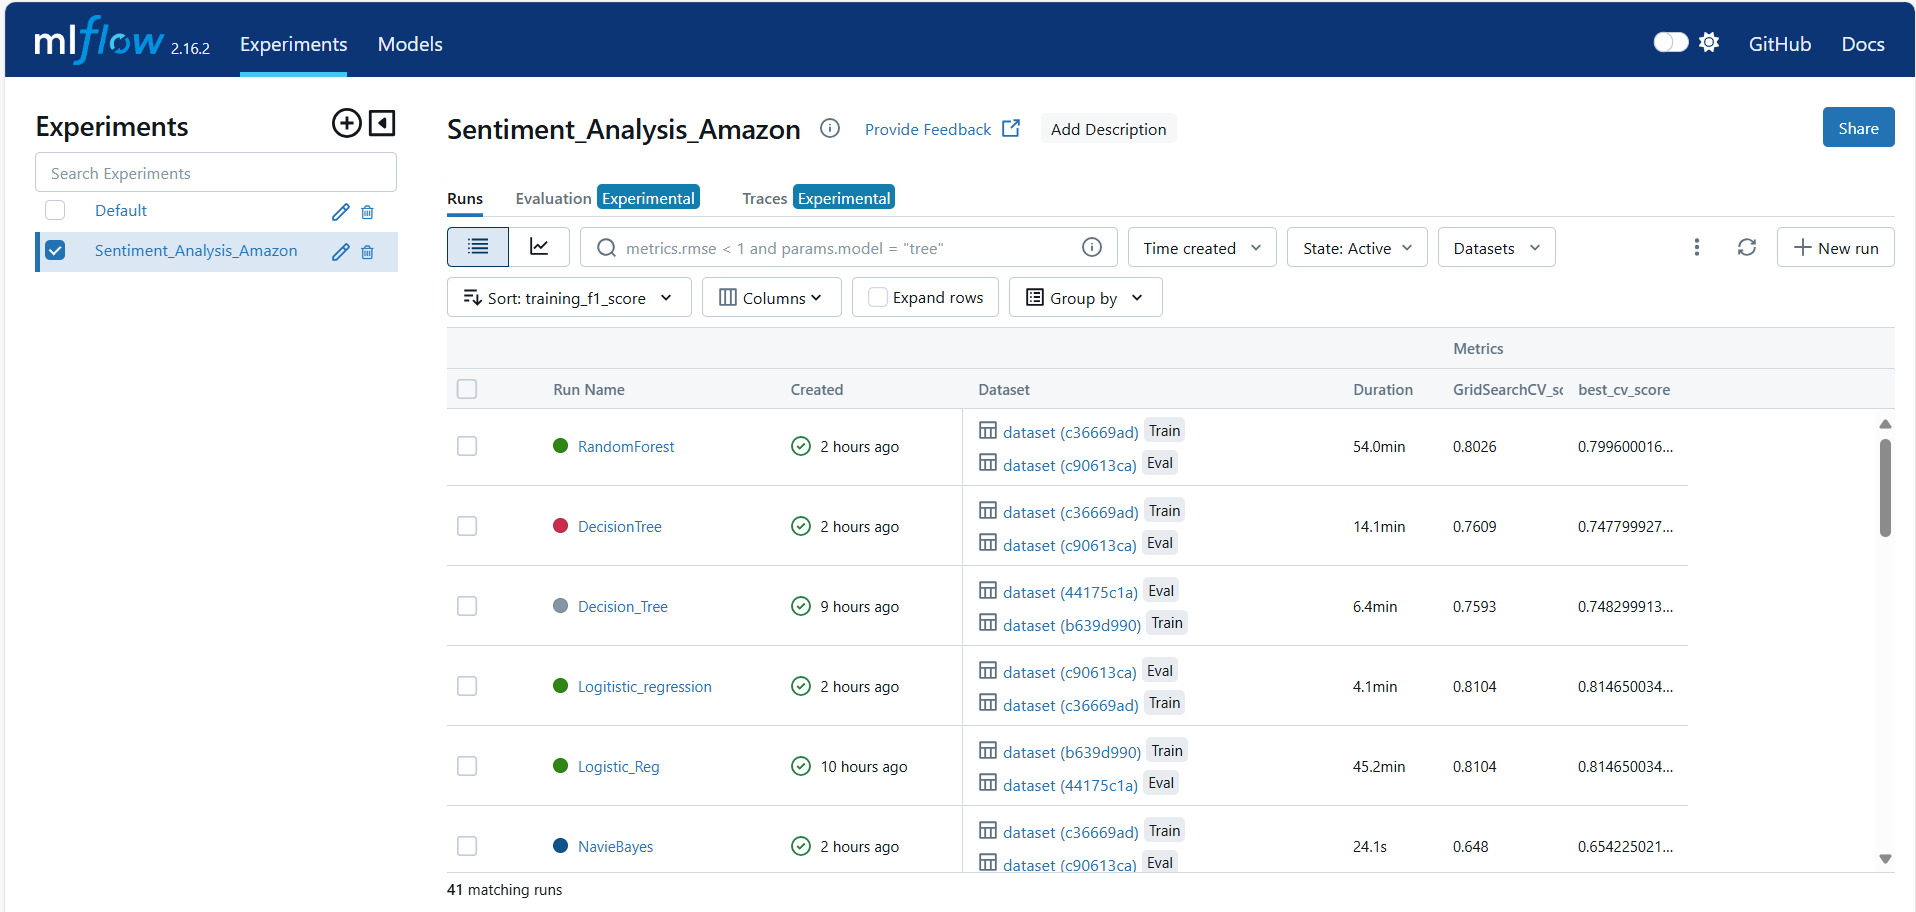


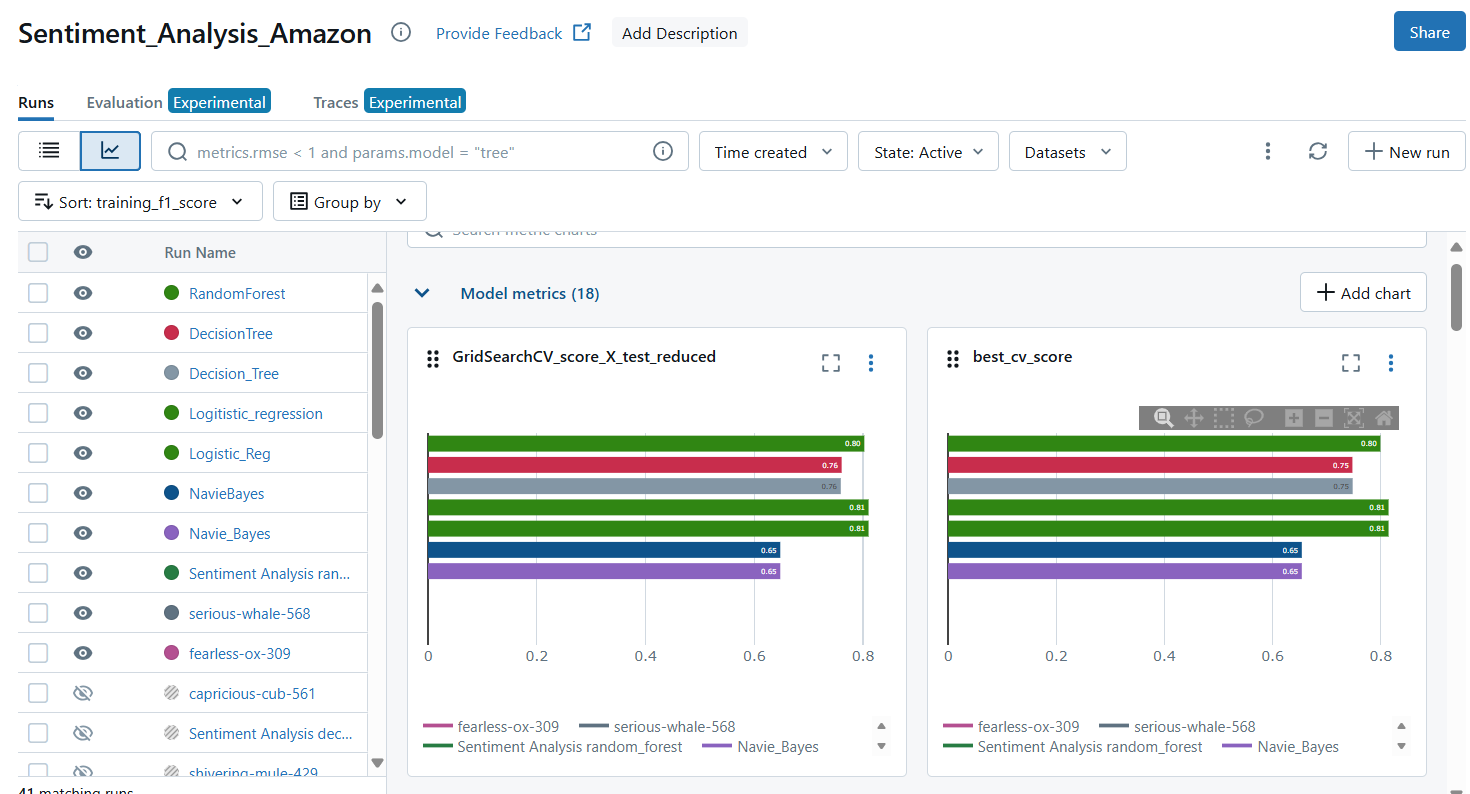

## Best model from all the models 

In [28]:
import mlflow
import mlflow.sklearn

# Load the best model from the artifact URI
model_uri = f"runs:/{best_run['run_id']}/model"  # Assuming 'model' is the registered model name
best_model = mlflow.sklearn.load_model(model_uri)

# Now, you can use best_model for predictions or analysis
print("Best Model Loaded:", best_model)

# You can also include it in your best model information
best_model_info = {
    'model': best_model,
    'test_score': best_run['metrics.GridSearchCV_score_X_test_reduced'],
    'best_hyperparameters': best_run.get('params.best_hyperparameter', 'No hyperparameters logged'),
    'run_id': best_run['run_id']
}

print("Best Model Information:")
print(best_model_info)


Best Model Loaded: GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'classifier__C': [10, 100],
                         'classifier__penalty': ['l1'],
                         'classifier__solver': ['liblinear']},
             return_train_score=True, scoring='accuracy', verbose=3)
Best Model Information:
{'model': GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'classifier__C': [10, 100],
                         'classifier__penalty': ['l1'],
                         'classifier__solver': ['liblinear']},
             return_train_score=True, scoring='accuracy', verbose=3), 'test_score': 0.8104, 'best_hyperparameters': None, 'run_id': 'f228f763710b4b3e8d0bda361ce6aa0e'}


# Hyperparameters of that model

In [29]:
# Get the best hyperparameters
best_hyperparameters = best_model.best_params_ if best_model.best_params_ else "No hyperparameters found"

# Update the best model information
best_model_info['best_hyperparameters'] = best_hyperparameters

print("Updated Best Model Information:")
print(best_model_info)


Updated Best Model Information:
{'model': GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'classifier__C': [10, 100],
                         'classifier__penalty': ['l1'],
                         'classifier__solver': ['liblinear']},
             return_train_score=True, scoring='accuracy', verbose=3), 'test_score': 0.8104, 'best_hyperparameters': {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}, 'run_id': 'f228f763710b4b3e8d0bda361ce6aa0e'}


# Predictions

In [30]:

predictions = best_model.predict(X_test_reduced)


# using Confusion Matrix

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming y_true are the true labels for the test data
y_pred = best_model.predict(X_test_reduced)

print(confusion_matrix(y_pred, y_test))
classification_report(y_pred, y_test)


[[ 536  113  211]
 [  23   29   33]
 [ 900  616 7539]]


'              precision    recall  f1-score   support\n\n           0       0.37      0.62      0.46       860\n           1       0.04      0.34      0.07        85\n           2       0.97      0.83      0.90      9055\n\n    accuracy                           0.81     10000\n   macro avg       0.46      0.60      0.48     10000\nweighted avg       0.91      0.81      0.85     10000\n'

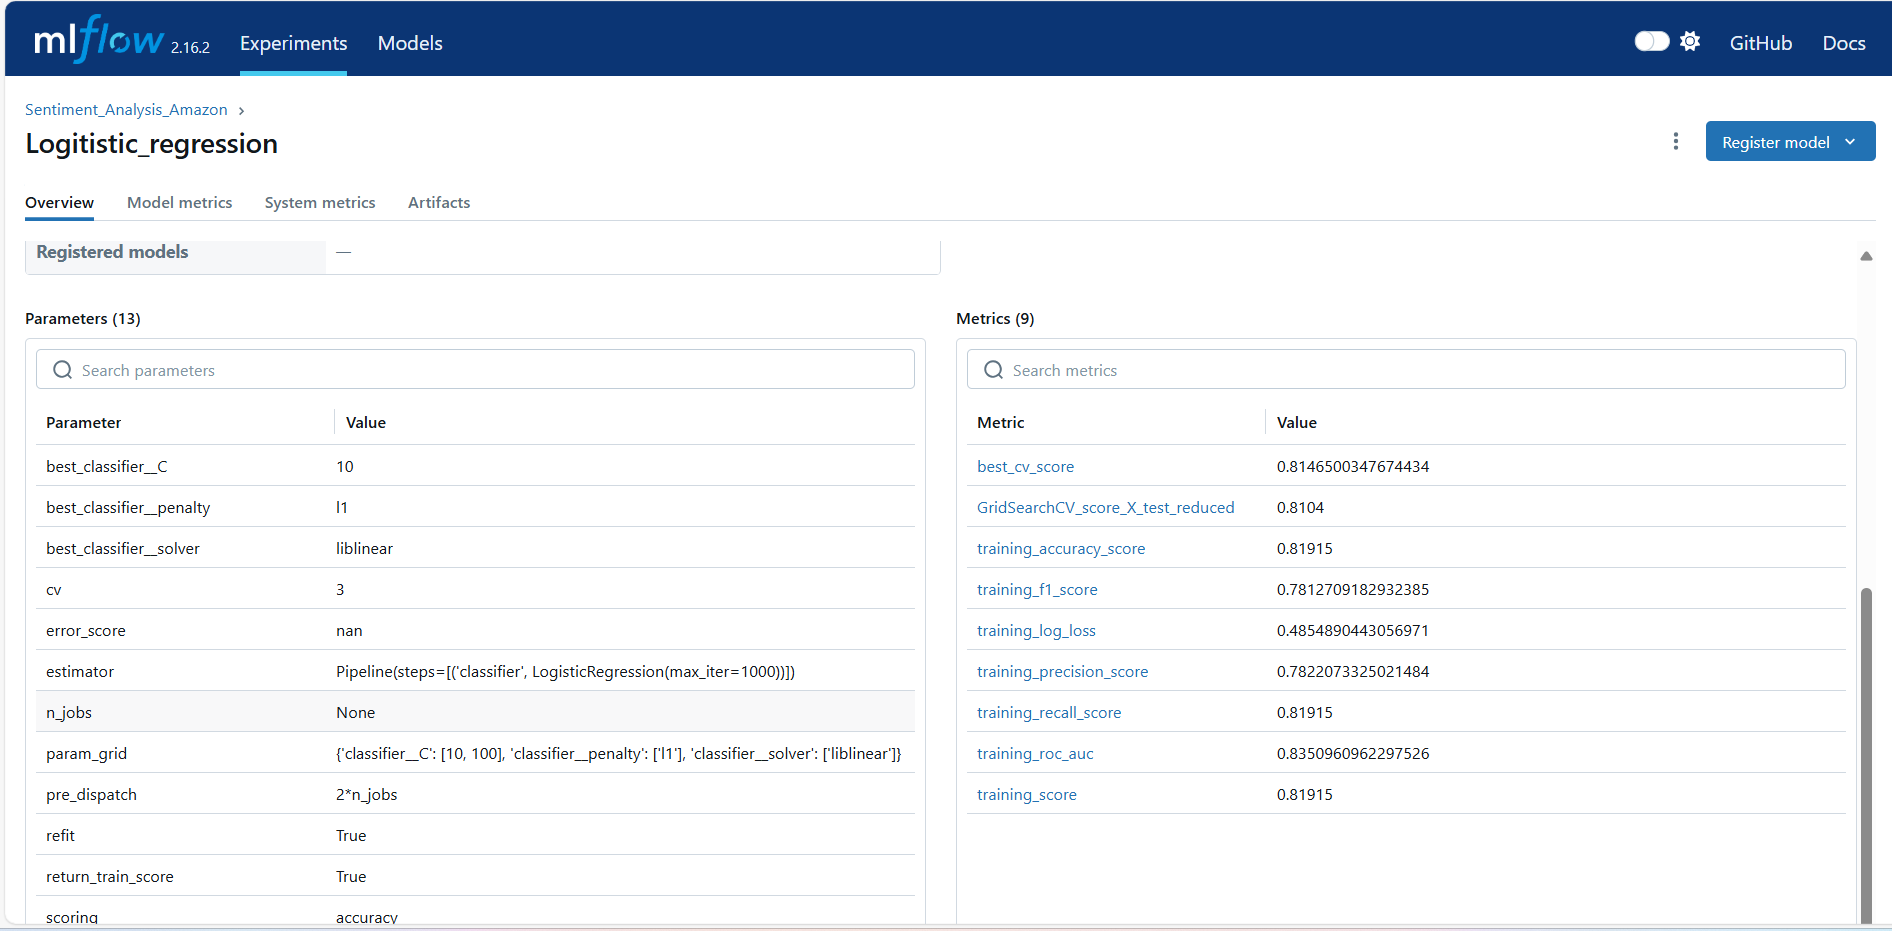

* **Rows represent the true classes (actual labels).**
* **Columns represent the predicted classes.**

*  **The model performs well in identifying class 2, with high precision and recall.**
* Class 1 has low precision and recall, indicating that the model struggles to correctly classify this class.
* Overall accuracy is decent at 81%, but the performance is imbalanced across classes.

## Recommendations
* **Logistic Regression** is the best model for deployment due to its balance of accuracy (81%), fast prediction time, and simplicity. 
* It is efficient with low computational resources and easy to interpret, making it ideal for real-time applications. * Compared to models like Random Forest or XGBoost, Logistic Regression offers quicker training and prediction, making it the optimal choice for deployment.


In [41]:
import mlflow.sklearn

# Start the MLflow run
with mlflow.start_run(run_name="Sentiment Analysis GridSearchCV") as run:
    # Log the best model from GridSearchCV
    mlflow.sklearn.log_model(grid_search.best_estimator_, "model")

    # Optionally, you can register the model in the MLflow Model Registry
    model_uri = f"runs:/{run.info.run_id}/model"
    mlflow.register_model(model_uri=model_uri, name="SentimentAnalysisModel")
    
    # Set additional tags or parameters
    mlflow.set_tag("developer", dev)
    mlflow.set_tag("team", "data_science")
    mlflow.set_tag("model_type", "GridSearchCV")
    mlflow.log_param("best_hyperparameters", grid_search.best_params_)


2024/09/25 21:41:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'SentimentAnalysisModel'.
2024/09/25 21:41:25 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SentimentAnalysisModel, version 1
Created version '1' of model 'SentimentAnalysisModel'.
2024/09/25 21:41:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Sentiment Analysis GridSearchCV at: http://127.0.0.1:5000/#/experiments/749261390504894018/runs/1773ccc6eb5146db86947e7ffbaf4037.
2024/09/25 21:41:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/749261390504894018.


In [42]:
# Import necessary functions for MLflow Model Registry
from mlflow.tracking import MlflowClient

# Initialize an MLflow client
client = MlflowClient()

# Loop through each algorithm pipeline to register the best models
for algo in best_models.keys():
    try:
        # Get the run ID for the model (you already have this in 'best_models')
        run_id = best_models[algo]['run_id']
        
        # Define model URI based on the run ID
        model_uri = f"runs:/{run_id}/model"
        
        # Register the model in the model registry
        model_name = f"Sentiment_Analysis_{algo}"
        registered_model = mlflow.register_model(model_uri=model_uri, name=model_name)
        
        print(f"Model {algo} registered successfully with version: {registered_model.version}")

    except Exception as e:
        print(f"Error registering model {algo}: {e}")


In [43]:
from mlflow.models.signature import infer_signature

# Infer the model's input/output signature
signature = infer_signature(X_test_reduced, y_pred)


In [44]:
import mlflow.sklearn

# Log the model with schema
with mlflow.start_run(run_name="Sentiment Analysis GridSearchCV") as run:
    mlflow.sklearn.log_model(
        sk_model=grid_search.best_estimator_, 
        artifact_path="model",
        signature=signature
    )
    
    # Optionally register the model
    model_uri = f"runs:/{run.info.run_id}/model"
    mlflow.register_model(model_uri=model_uri, name="SentimentAnalysisModel")


Registered model 'SentimentAnalysisModel' already exists. Creating a new version of this model...
2024/09/25 21:43:13 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SentimentAnalysisModel, version 2
Created version '2' of model 'SentimentAnalysisModel'.
2024/09/25 21:43:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Sentiment Analysis GridSearchCV at: http://127.0.0.1:5000/#/experiments/749261390504894018/runs/955174eaef5d46d1ab503aa646ebf44e.
2024/09/25 21:43:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/749261390504894018.


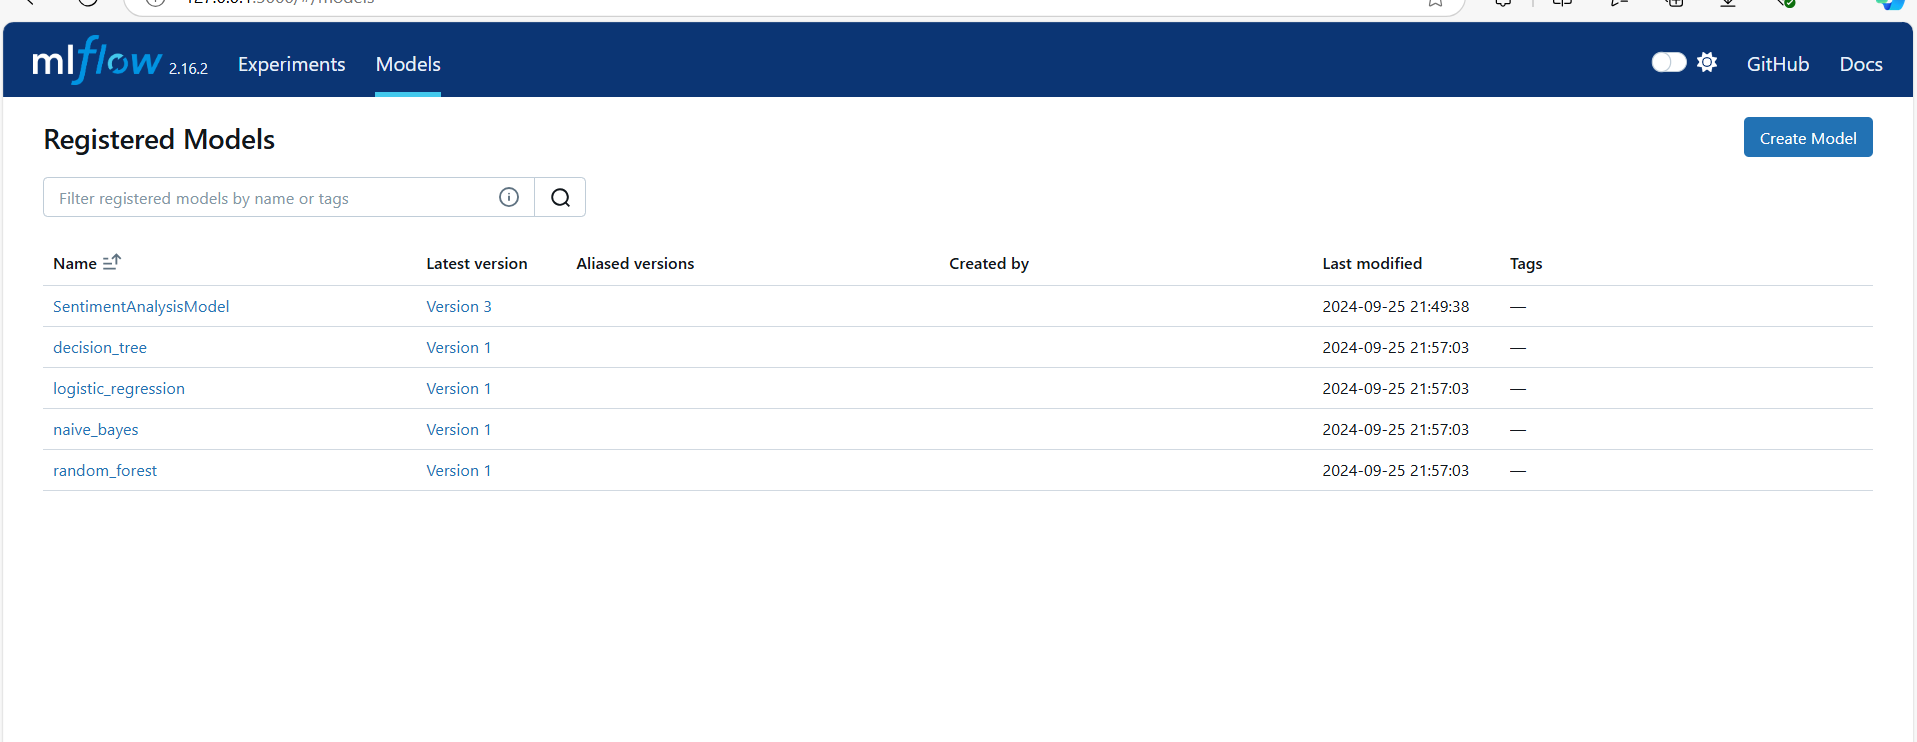